In [1]:
import psycopg2
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import log_loss
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
params = params = {
    "host": "localhost",
    "user": "postgres",
    "port": 5432
}
connection = psycopg2.connect(**params, dbname= "postgres")

In [3]:
df = pd.read_sql("select * from public.spotify_log sl join public.spotify_track st on sl.track_id_clean = st.track_id;", connection)

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,4,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,11,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,17,20,t_bff5b6c6-6968-41be-b723-7e860b372975,False,True,True,False,0,1,...,4,0.283693,-0.837439,0.368295,0.271468,0.024429,-0.292806,0.032801,-0.485078,0.183784
4,0_0000a72b-09ac-412f-b452-9b9e79bded8f,2,20,t_0632570b-b4b4-4c3c-b47c-443ec9fbaa11,True,True,True,False,0,1,...,4,0.555482,0.203349,0.247835,-0.136071,-0.440866,0.680082,0.181352,-0.279335,0.001125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

In [6]:
df.date.unique()

array(['2018-07-15', '2018-07-14', '2018-07-13', '2018-07-12',
       '2018-06-05', '2018-07-11', '2018-07-16', '2018-07-10',
       '2018-07-04', '2018-07-05', '2018-07-07', '2018-07-06',
       '2018-05-12', '2018-07-09', '2018-06-29', '2018-06-30',
       '2018-06-19', '2018-05-18'], dtype=object)

In [7]:
def weekday_converter(date):
    format = '%Y-%m-%d'
    datetime_date = datetime.datetime.strptime(date,format)
    weekdays_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return weekdays_list[datetime_date.weekday()]

df = df.assign(weekday=df.date.apply(weekday_converter))
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,weekday
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,Sunday
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,Sunday
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,11,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187,Sunday
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,17,20,t_bff5b6c6-6968-41be-b723-7e860b372975,False,True,True,False,0,1,...,0.283693,-0.837439,0.368295,0.271468,0.024429,-0.292806,0.032801,-0.485078,0.183784,Sunday
4,0_0000a72b-09ac-412f-b452-9b9e79bded8f,2,20,t_0632570b-b4b4-4c3c-b47c-443ec9fbaa11,True,True,True,False,0,1,...,0.555482,0.203349,0.247835,-0.136071,-0.440866,0.680082,0.181352,-0.279335,0.001125,Sunday


In [8]:
def track_age_calculator(year):
    return 2022-year

df = df.assign(track_age=df.release_year.apply(track_age_calculator))
df[['release_year','track_age']]

,release_year,track_age
0,2018,4
1,2018,4
2,2018,4
3,2018,4
4,1974,48
...,...,...
167875,2015,7
167876,2018,4
167877,2018,4
167878,2018,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

In [10]:
df.drop('session_id', inplace=True, axis=1)
df.drop('track_id_clean', inplace=True, axis=1)
df.drop('skip_1', inplace=True, axis=1)
df.drop('skip_3', inplace=True, axis=1)
df.drop('not_skipped', inplace=True, axis=1)
df.drop('date', inplace=True, axis=1)
df.drop('track_id', inplace=True, axis=1)

In [11]:
df = pd.get_dummies(df, columns=['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
                                      'weekday','mode'], drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   session_position                            167880 non-null  int64  
 1   session_length                              167880 non-null  int64  
 2   skip_2                                      167880 non-null  bool   
 3   context_switch                              167880 non-null  int64  
 4   no_pause_before_play                        167880 non-null  int64  
 5   short_pause_before_play                     167880 non-null  int64  
 6   long_pause_before_play                      167880 non-null  int64  
 7   hist_user_behavior_n_seekfwd                167880 non-null  int64  
 8   hist_user_behavior_n_seekback               167880 non-null  int64  
 9   hist_user_behavior_is_shuffle               167880 non-null  bool   
 

In [13]:
df["skip_2"] = df["skip_2"].astype(int)
df["hist_user_behavior_is_shuffle"] = df["hist_user_behavior_is_shuffle"].astype(int)
df["premium"] = df["premium"].astype(int)

In [14]:
target_count = df.skip_2.value_counts(normalize=True)
target_count

1    0.517179
0    0.482821
Name: skip_2, dtype: float64

In [15]:
columns = df.columns.tolist()
columns = [columns[2]] + columns[0:2] + columns[3:]
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   skip_2                                      167880 non-null  int64  
 1   session_position                            167880 non-null  int64  
 2   session_length                              167880 non-null  int64  
 3   context_switch                              167880 non-null  int64  
 4   no_pause_before_play                        167880 non-null  int64  
 5   short_pause_before_play                     167880 non-null  int64  
 6   long_pause_before_play                      167880 non-null  int64  
 7   hist_user_behavior_n_seekfwd                167880 non-null  int64  
 8   hist_user_behavior_n_seekback               167880 non-null  int64  
 9   hist_user_behavior_is_shuffle               167880 non-null  int64  
 

In [16]:
X_train, x_test, Y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], 
                                                    test_size = 0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=42)

In [17]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_val)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_val = round(random_forest.score(x_val, y_val) * 100, 2)

In [18]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
x_train_scaled = std_scale.fit_transform(x_train)
x_val_scaled = std_scale.transform(x_val)
x_test_scaled = std_scale.transform(x_test)

In [19]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_scaled, y_train)

Y_pred = logreg.predict(x_val_scaled)

acc_log_train = round(logreg.score(x_train_scaled, y_train) * 100, 2)
acc_log_val = round(logreg.score(x_val_scaled, y_val) * 100, 2)

In [20]:
from joblib import dump, load

# Save the model via pickle
dump(logreg, 'spotify_logreg_model.pkl')

['spotify_logreg_model.pkl']

In [21]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores_accuracy)
print("Mean:", scores_accuracy.mean())
print("Standard Deviation:", scores_accuracy.std())

Scores: [0.87991422 0.87641966 0.8772933  0.87387817 0.87236915 0.87570487
 0.87340164 0.87173378 0.87411643 0.87610198]
Mean: 0.8750933206258438
Standard Deviation: 0.0023501475658003652


In [22]:
scores_recall = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "recall")

print("Scores:", scores_recall)
print("Mean:", scores_recall.mean())
print("Standard Deviation:", scores_recall.std())

Scores: [0.92635778 0.92926193 0.92496547 0.92619303 0.92343103 0.92619303
 0.92742059 0.92450514 0.92772748 0.9301826 ]
Mean: 0.9266238091487118
Standard Deviation: 0.0019837395527734477


In [23]:
scores_precision = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "precision")

print("Scores:", scores_precision)
print("Mean:", scores_precision.mean())
print("Standard Deviation:", scores_precision.std())

Scores: [0.85403112 0.84687456 0.85093168 0.8450231  0.84451305 0.84775281
 0.84354501 0.84289312 0.84441341 0.84582112]
Mean: 0.8465798976584358
Standard Deviation: 0.0033269955088058717


In [24]:
scores_f1 = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "f1")

print("Scores:", scores_f1)
print("Mean:", scores_f1.mean())
print("Standard Deviation:", scores_f1.std())

Scores: [0.88872535 0.88615745 0.88640541 0.88374817 0.88221066 0.88523869
 0.88349656 0.88181486 0.88411201 0.88599825]
Mean: 0.8847907400789318
Standard Deviation: 0.0020087342847841813


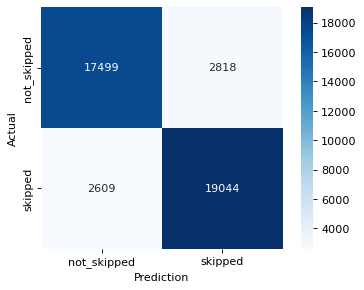

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def make_confusion_matrix(model, threshold=0.6): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['not_skipped', 'skipped'],
           yticklabels=['not_skipped', 'skipped']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    
make_confusion_matrix(logreg) # En başarılı olan modelimiz

In [26]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logreg, threshold), threshold=(0.0,1.0,0.05))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

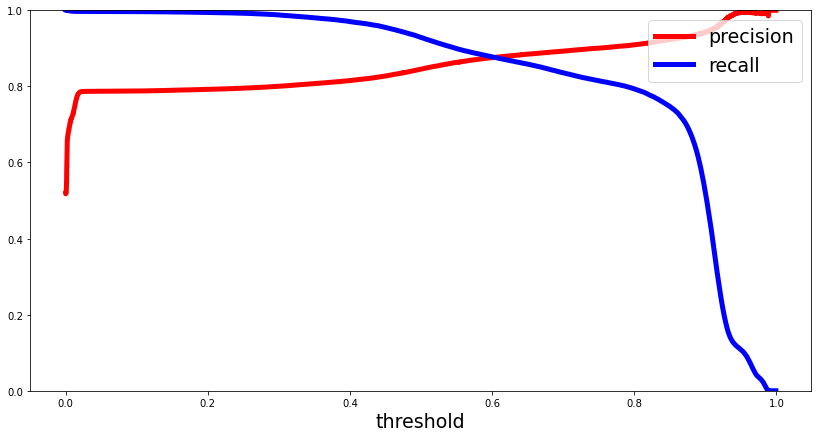

In [27]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg.predict_proba(X_train_scaled)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

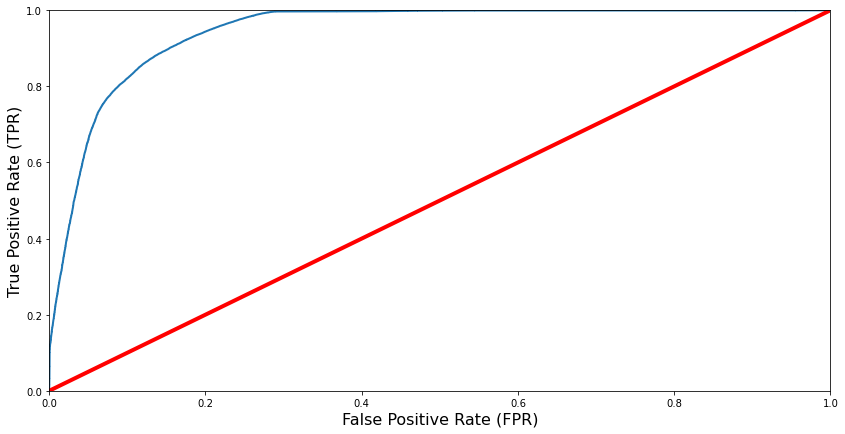

In [28]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=[14, 7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [29]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC Score:", r_a_score)

ROC-AUC Score: 0.944832536472698


In [30]:
predict_df = df.iloc[:, 1:].copy()
predict_df_scaled = std_scale.transform(predict_df)

In [31]:
new_pred = logreg.predict(predict_df_scaled)
new_pred

array([0, 1, 1, ..., 0, 0, 0])

In [32]:
predict_df["Prediction"] = new_pred # Yaptığımız tahminleri DataFrame'e ekleme
predict_df["Prediction"] = predict_df["Prediction"].apply(lambda x: str(x).replace("0","not_skipped"))
predict_df["Prediction"] = predict_df["Prediction"].apply(lambda x: str(x).replace("1","skipped"))

In [33]:
predict_df

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mode_minor,Prediction
0,3,20,0,1,0,0,0,0,1,16,...,0,1,0,0,1,0,0,0,0,not_skipped
1,10,20,0,1,0,0,0,0,1,16,...,0,0,0,0,1,0,0,0,1,skipped
2,11,20,0,1,0,0,0,0,1,16,...,0,0,0,0,1,0,0,0,1,skipped
3,17,20,0,1,0,0,0,0,1,16,...,0,0,0,0,1,0,0,0,1,skipped
4,2,20,0,1,0,0,0,0,1,14,...,0,0,0,0,1,0,0,0,0,skipped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,11,12,0,1,0,0,0,0,0,20,...,0,0,0,1,0,0,0,0,0,skipped
167876,1,20,0,0,0,0,0,0,0,12,...,0,1,0,0,1,0,0,0,0,not_skipped
167877,7,20,0,1,0,0,0,0,0,12,...,0,1,0,0,1,0,0,0,0,not_skipped
167878,14,20,0,1,0,0,0,0,0,13,...,0,1,0,0,1,0,0,0,0,not_skipped


In [34]:
predict_df.Prediction.unique()

array(['not_skipped', 'skipped'], dtype=object)

In [35]:
prediction_count = predict_df.Prediction.value_counts(normalize=True)
prediction_count

skipped        0.568001
not_skipped    0.431999
Name: Prediction, dtype: float64